## Load and Preprocess the MNIST Dataset

(60000, 28, 28)
Training data shape: (60000, 784)
Test data shape: (10000, 784)


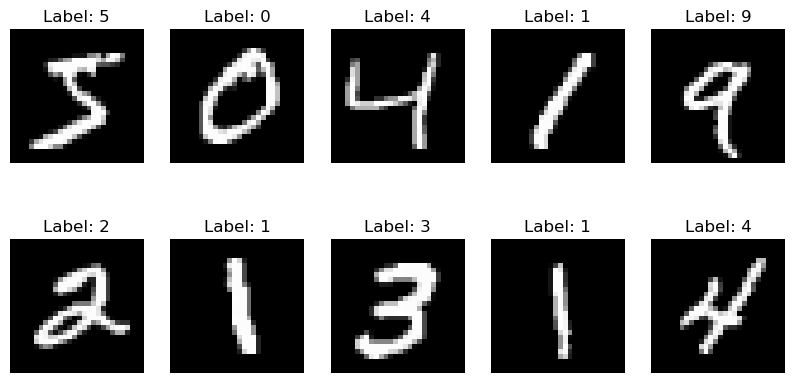

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

#Load the dataset from kerasdatasets and separate into train and test sets
#Print the shape to determine how to preprocess (need to reduce size increase size etc.)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)

#Because the dataset consists of images each pixel represent num from 0 255 by dividing by 255 we get value from 0-1
#representing the percent intensity of each pixel
#This also normalizes the values and decreases range -> diff(255-0) is much much greater than diff(1-0) = better for model
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

#Reshape the images to 28x28 1D array from 2D
#FC layer takes in 1D array input
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)


print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

#Iterate the first 10 images and print them in the original shape with the proper label
#Allows us to visualize what we are working with
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()


In [3]:
!pip install tensorflow

## Build the Neural Network Model

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

#Build the neural network model
model = Sequential([
    Input(shape=(28*28,)), 
    Dense(128, activation='relu'),  
    Dense(10, activation='softmax') 
])

model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

## Train the Neural Network

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8738 - loss: 0.4459 - val_accuracy: 0.9581 - val_loss: 0.1473
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9662 - loss: 0.1208 - val_accuracy: 0.9671 - val_loss: 0.1024
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9766 - loss: 0.0791 - val_accuracy: 0.9704 - val_loss: 0.0946
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9827 - loss: 0.0554 - val_accuracy: 0.9770 - val_loss: 0.0784
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9870 - loss: 0.0440 - val_accuracy: 0.9757 - val_loss: 0.0816
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9902 - loss: 0.0335 - val_accuracy: 0.9793 - val_loss: 0.0684
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9917 - loss: 0.0264 - val_accuracy: 0.9793 - val_loss: 0.0680
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9938 - loss: 0.02

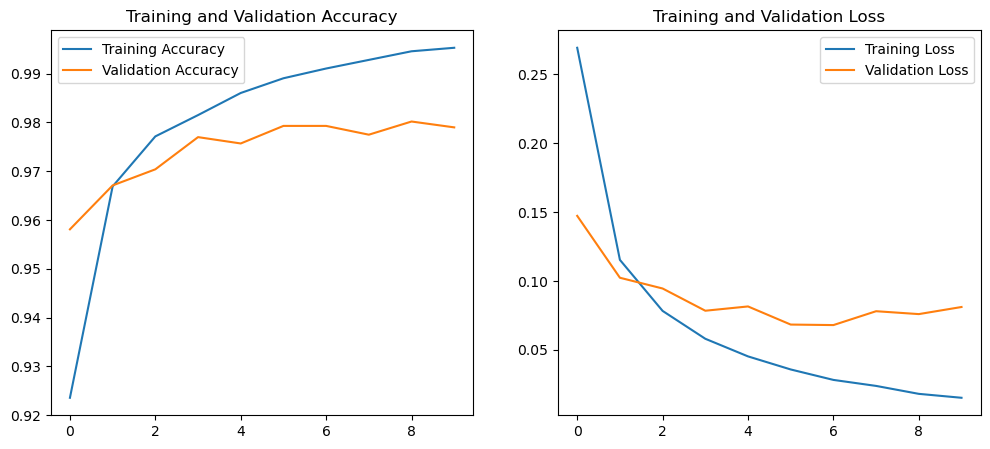

In [19]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

#Compile the model with an optimizer on the metric of accuracy
#Loss function is sparse categorical crossentropy better because labels are not one-hot encoded
#Results will be 0-9 predictions so categorical
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#This allows us to go more parameters without overfitting as we save the model with best validation accuracy
#Thus we can go past point of best model overfit and it does not matter because we will use the parameters from highest validation accuracy
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy', mode='max')

#Fit the model to the training data with 10 epochs and 32 batch size to allow faster training and still get convergence
#If we do all samples at once takes longer
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32, callbacks=[checkpoint])

#Show the training accuracy and validation accuracy across epochs
#Lets us visualize when to stop training as our accuracy on validation is no longer improving
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

#Show training and validation losses across epochs
#Lets us see when our losses increase aka when to stop training
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


## Evaluate the Model

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9772 - loss: 0.0908
Test Accuracy: 0.9802
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.97      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.97      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



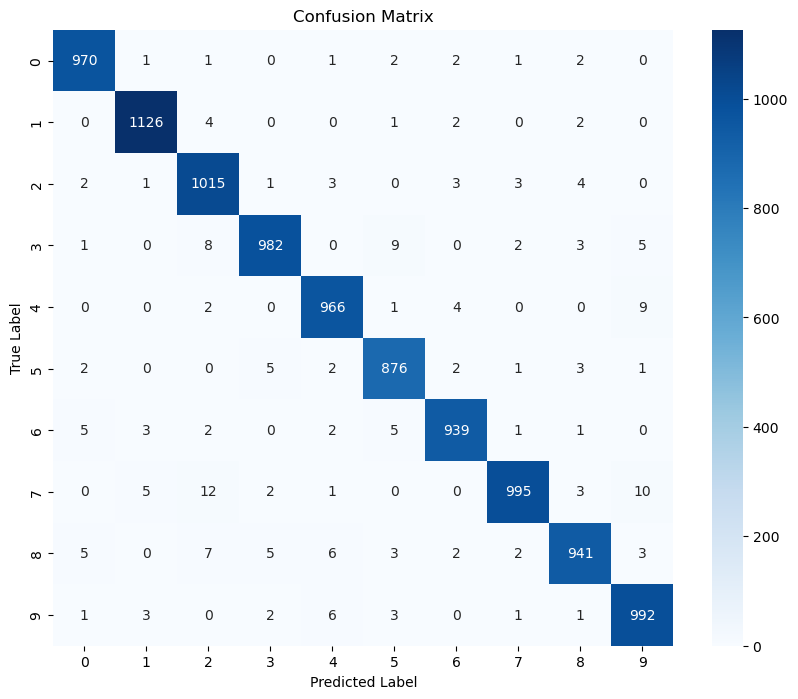

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


best_model = tf.keras.models.load_model('best_model.keras')

#Evaluate the model on the test data and store the accuracy and loss
#Use this to see how your model performs on test data
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

#Using the best model parameters learned in above cell make predictions on the test data
#The prediction is returned as an array of probabilities by using argmax we take the highest probability class as our prediction
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

#Create the confusion matrix given the test data and our predictions
#We can visualize our false positives false negative and see which numbers are causing our model the most problems
cm = confusion_matrix(y_test, y_pred_classes)

#Actually print the confusion matrix on a heatmap with higher intensity on highly accurate predictions or matches
#Lighter colors represent misclassifications
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=[str(i) for i in range(10)], yticklabels=[str(i) for i in range(10)])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Visualize Predictions

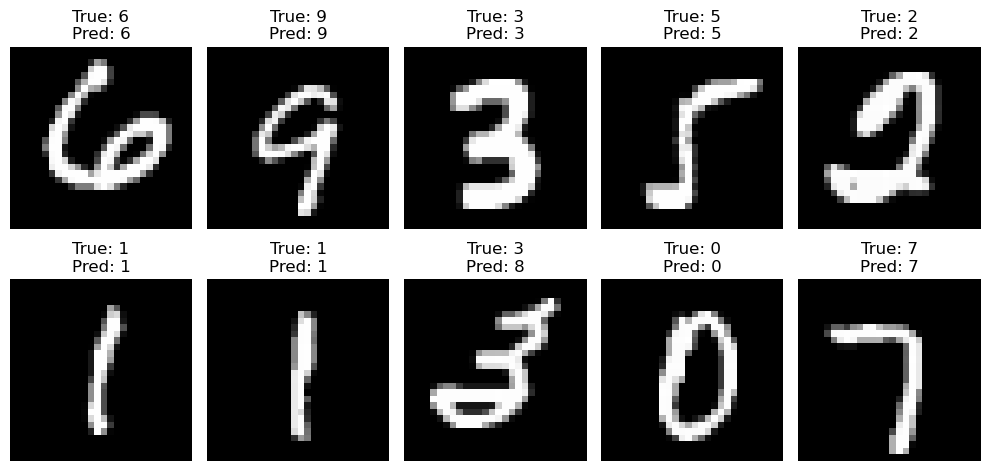

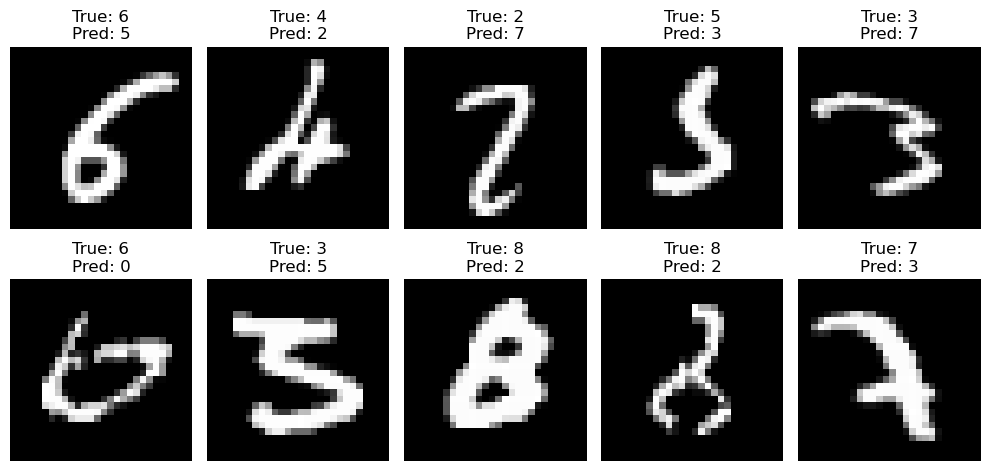

In [25]:
#Randomly select 10 indices so we can visualize how our model does on 10 random samples
indices = np.random.choice(len(X_test), 10, replace=False)

#For these 10 indices print the image with the predicted label and corresponding label
plt.figure(figsize=(10, 5))
for i, idx in enumerate(indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

#Choose 10 indices where our prediction is incorrect allowing us to see which combinations are causing issues with the model
incorrect_indices = np.where(y_test != y_pred_classes)[0]

#Iterate the indices printing the image predicted label and actual label
plt.figure(figsize=(10, 5))
for i, idx in enumerate(incorrect_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[idx]}\nPred: {y_pred_classes[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
